In [24]:
### Healthcare Project
### classification is the problem of identifying to which of a set of categories a new observation belongs, 
### on the basis of a training set of data containing observations whose category membership is known

from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('ggplot')
from sklearn.metrics import precision_score,recall_score,confusion_matrix,classification_report,roc_curve,precision_recall_curve
import itertools
#ggplot is R based visualisation package that provides better graphics and visualization

In [2]:
##Loading the dataset
diabetes_data = pd.read_csv('C:/Users/singh/Desktop/Healthcare/Project/diabetes.csv')

In [3]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [48]:
diabetes_data.shape

(768, 9)

In [49]:
diabetes_data.groupby('Outcome').count()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


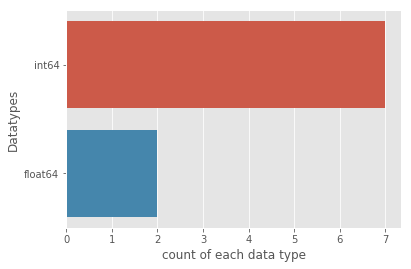

In [50]:
sns.countplot(y=diabetes_data.dtypes,data=diabetes_data)
plt.xlabel("count of each data type")
plt.ylabel("Datatypes")
plt.show()

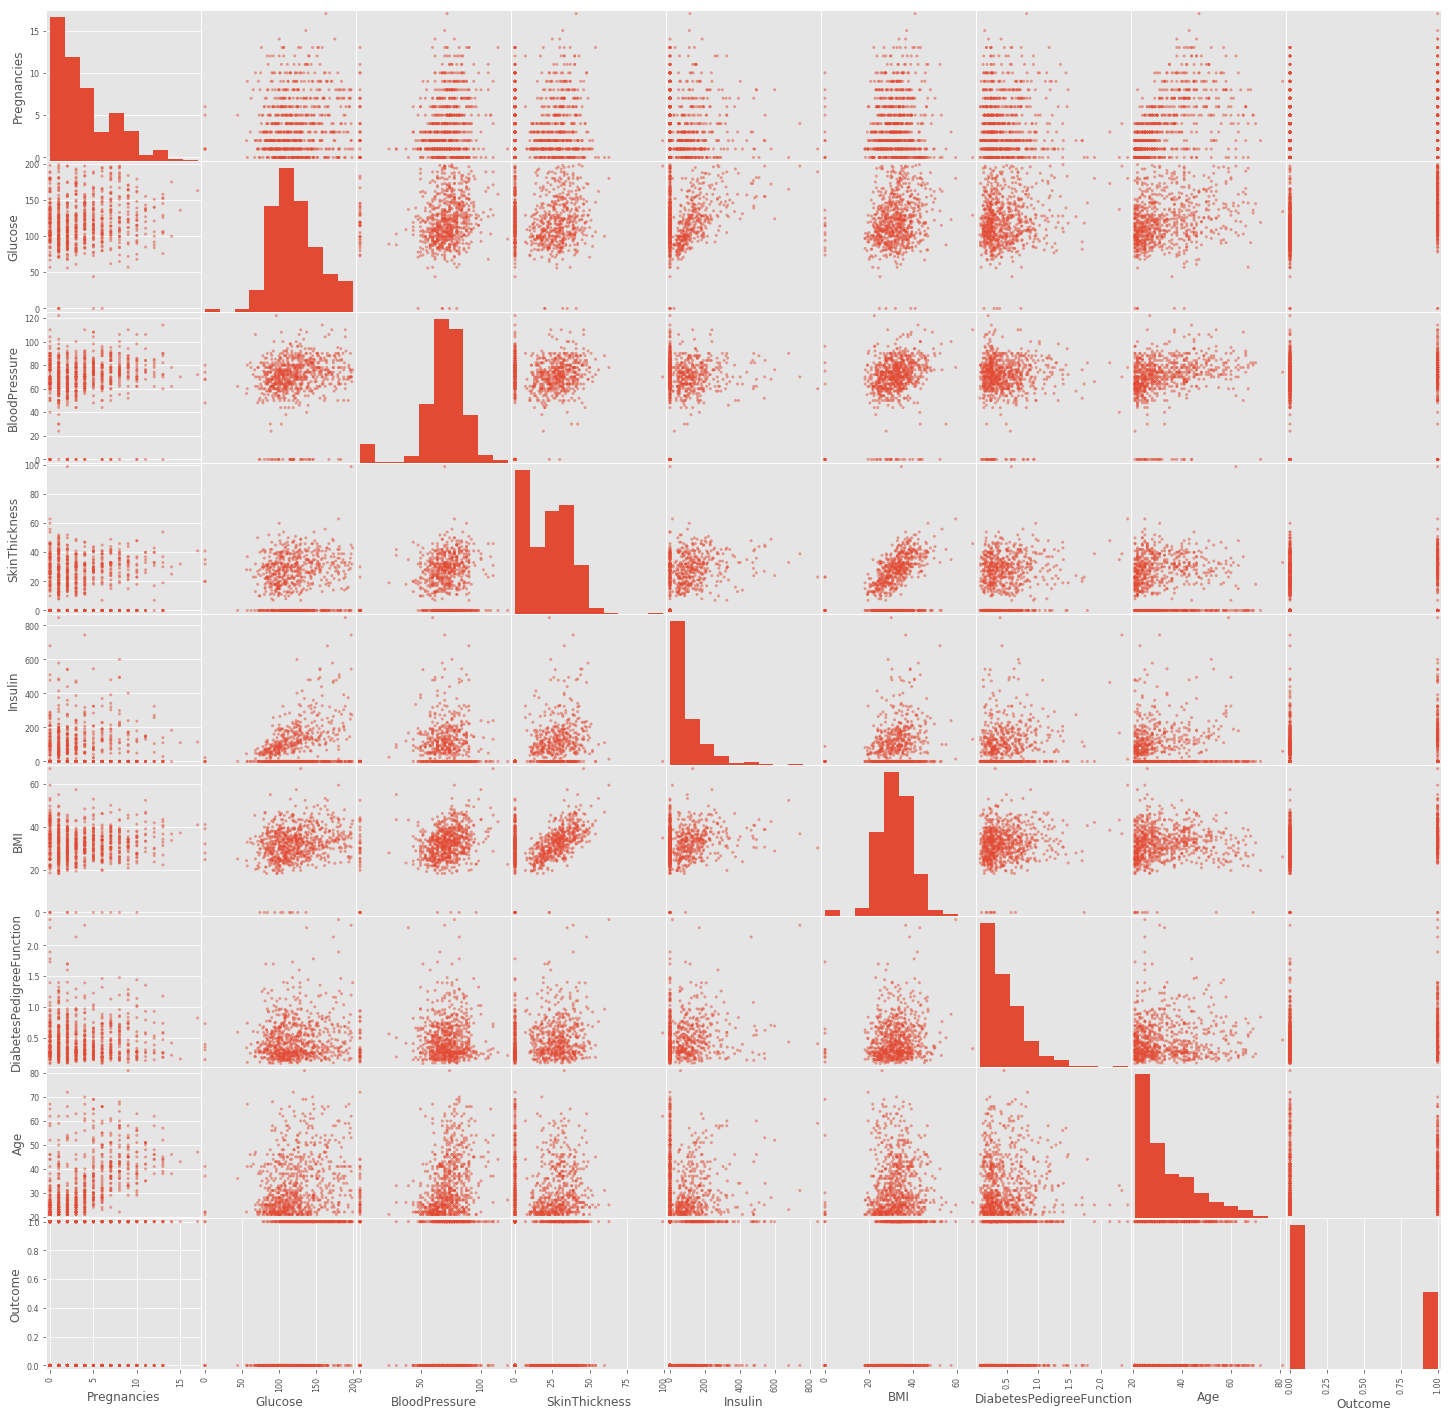

In [7]:
from pandas.tools.plotting import scatter_matrix
p=scatter_matrix(diabetes_data,figsize=(25, 25))

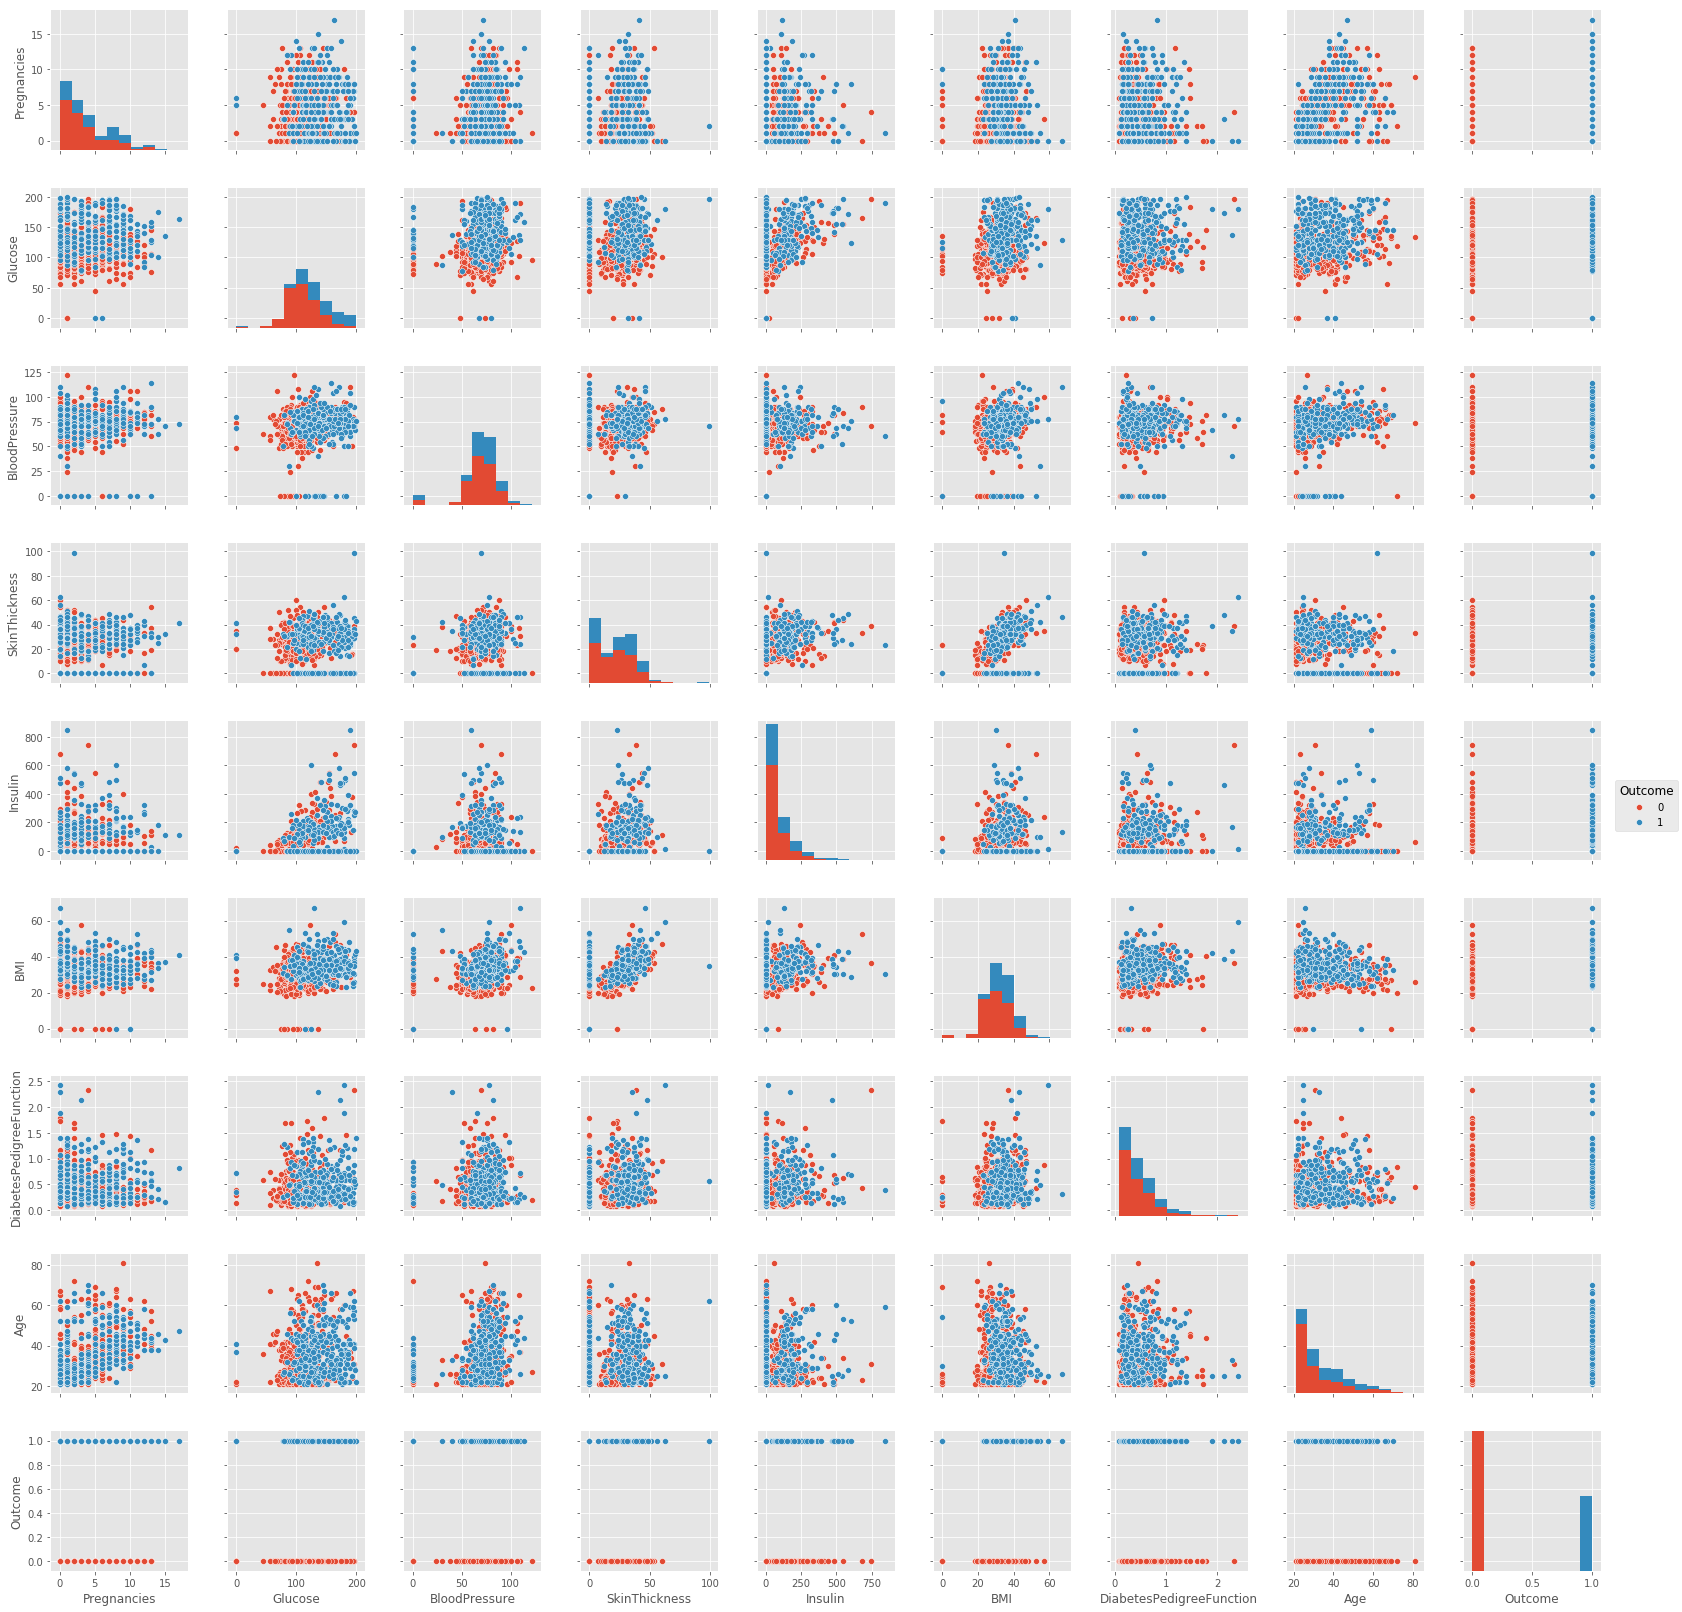

In [42]:
p=sns.pairplot(diabetes_data, hue = 'Outcome')

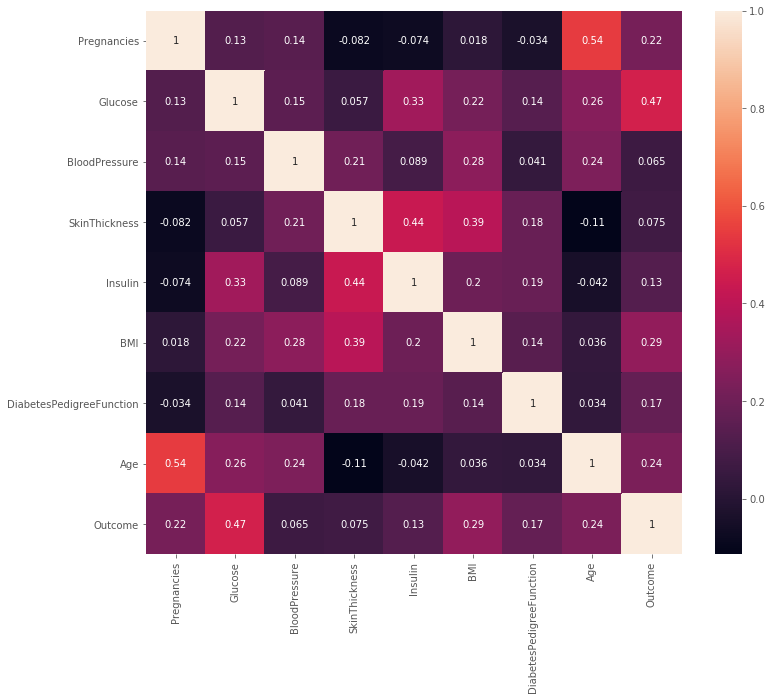

In [53]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(diabetes_data.corr(), annot=True)  # seaborn has very simple solution for heatmap

In [8]:
X = diabetes_data.drop("Outcome",axis = 1)
y = diabetes_data.Outcome

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42, stratify=y)

In [10]:
# confusion matrix 
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix"',
                          cmap = plt.cm.Blues) :
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [11]:
def show_metrics():
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    print('Precision =     {:.3f}'.format(tp/(tp+fp)))
    print('Recall    =     {:.3f}'.format(tp/(tp+fn)))
    print('F1_score  =     {:.3f}'.format(2*(((tp/(tp+fp))*(tp/(tp+fn)))/
                                                 ((tp/(tp+fp))+(tp/(tp+fn))))))

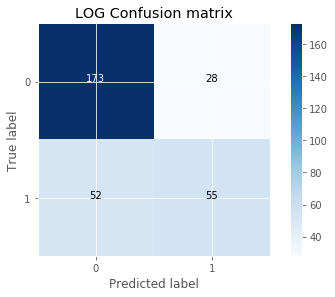

Precision =     0.663
Recall    =     0.514
F1_score  =     0.579


In [12]:
##Logistic regression
from sklearn.linear_model import LogisticRegression
log_cfl = LogisticRegression()
log_cfl.fit(X_train,y_train)
y_pred = log_cfl.predict(X_test)
y_score = log_cfl.decision_function(X_test)
# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes = class_names, 
                      title = 'LOG Confusion matrix')
plt.show()

show_metrics()

In [13]:
from pprint import pprint
print('Parameters currently in use:\n')
pprint(log_cfl.get_params())

Parameters currently in use:

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


In [14]:
#finding best parameters 
from sklearn.model_selection import GridSearchCV
param_grid = {
            'penalty' : ['l1','l2'], 
            'class_weight' : ['balanced', None], 
            'C' : [0.1, 1, 10, 100]
            }
CV_log_cfl = GridSearchCV(estimator = log_cfl, param_grid = param_grid , scoring = 'recall', verbose = 1, n_jobs = -1)
CV_log_cfl.fit(X_train, y_train)
best_parameters = CV_log_cfl.best_params_
print('The best parameters for using this model is', best_parameters)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
The best parameters for using this model is {'C': 1, 'class_weight': 'balanced', 'penalty': 'l2'}


[Parallel(n_jobs=-1)]: Done  41 out of  48 | elapsed:    3.1s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    3.1s finished


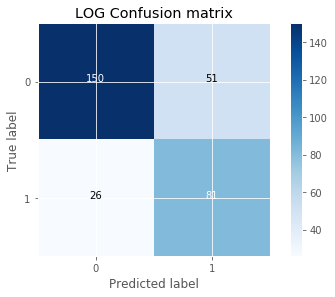

Precision =     0.614
Recall    =     0.757
F1_score  =     0.678


In [15]:
log_cfl = LogisticRegression(C = best_parameters['C'], 
                             penalty = best_parameters['penalty'], 
                             class_weight = best_parameters['class_weight'])

log_cfl.fit(X_train, y_train)
y_pred = log_cfl.predict(X_test)
y_score = log_cfl.decision_function(X_test)


# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes=class_names, 
                      title='LOG Confusion matrix')

plt.savefig('4.log_cfl_confusion_matrix.png')
plt.show()

show_metrics()

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

test_scores = []
train_scores = []
validation_scores = []
X_train_values = X_train.values
y_train_values = y_train.values

## cross validation with KFold algorithm
kfold = KFold(5, shuffle=True, random_state=42)
for i in range(1,15):

    knn = KNeighborsClassifier(i)

    tr_scores = []
    ts_scores = []
    for train_ix, test_ix in kfold.split(X_train_values):
        # define train/test X/y
        X_train_fold, y_train_fold = X_train_values[train_ix],y_train_values[train_ix]
        X_test_fold, y_test_fold = X_train_values[test_ix], y_train_values[test_ix]
        knn.fit(X_train_fold,y_train_fold)
        ts_scores.append(knn.score(X_test_fold,y_test_fold))
        tr_scores.append(knn.score(X_train_fold,y_train_fold))
    validation_scores.append(np.mean(ts_scores))
    train_scores.append(np.mean(tr_scores))
    test_scores.append(knn.score(X_test,y_test))

In [17]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} and index {}'.format(max_train_score,train_scores_ind))

Max train score 1.0 and index [0]


In [18]:
## score that comes from testing on the datapoints that were left out in KFold to be used for validation
max_validation_score = max(validation_scores)
validation_scores_ind = [i for i, v in enumerate(validation_scores) if v == max_validation_score]
print('Max validation score {} and index {}'.format(max_validation_score,validation_scores_ind))

Max validation score 0.7456521739130435 and index [12]


In [19]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} and index {}'.format(max_test_score,test_scores_ind))

Max test score 0.7175324675324676 and index [11]


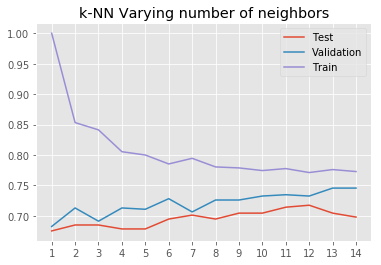

In [20]:
plt.title('k-NN Varying number of neighbors')
plt.plot(range(1,15),test_scores,label="Test")
plt.plot(range(1,15),validation_scores,label="Validation")
plt.plot(range(1,15),train_scores,label="Train")
plt.legend()
plt.xticks(range(1,15))
plt.show()

In [21]:
#Setup a knn classifier with k neighbors
kfold = KFold(5, shuffle=True, random_state=42)
knn = KNeighborsClassifier(12)

for train_ix, test_ix in kfold.split(X_train_values):
        # define train/test X/y
        X_train_fold, y_train_fold = X_train_values[train_ix],y_train_values[train_ix]
        X_test_fold, y_test_fold = X_train_values[test_ix], y_train_values[test_ix]
        knn.fit(X_train_fold,y_train_fold)
#knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.7175324675324676

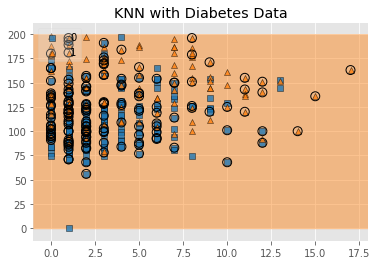

In [26]:
value = 20000
width = 20000
plot_decision_regions(X.values, y.values, clf=knn, legend=2, 
                      filler_feature_values={2: value, 3: value, 4: value, 5: value, 6: value, 7: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6: width, 7: width},
                      X_highlight=X_test.values)

# Adding axes annotations
#plt.xlabel('sepal length [cm]')
#plt.ylabel('petal length [cm]')
plt.title('KNN with Diabetes Data')
plt.show()

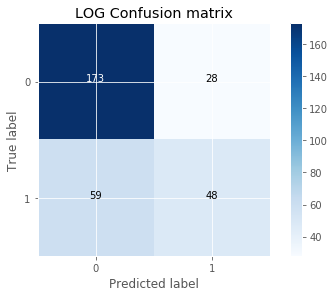

Precision =     0.632
Recall    =     0.449
F1_score  =     0.525


In [28]:
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes = class_names, 
                      title = 'LOG Confusion matrix')
plt.show()

show_metrics()